In [5]:
import numpy as np
import matplotlib.pyplot as plt

### 3.6 Signal Processing

Fourier Transform gives us ability to view our data in a completely different perspective, which is the data in time-domain to its frequency domain. Knowing the frequency domain allow us to understand about the frequency component with in the data. This opens a number of opportunities to process the data in many ways.

One of the application that we will be using in the topic is the noise reduction example. The data collected usaully contains unwanted noise, which we can filter out easily in the frequency domain. Once the noise frequency has been removed, we can perform an inverse Fourier Transform or Discrete Fourier Transform to obtain the cleaned signal.

___
#### Removing Noise from Data

Example below is from https://towardsdatascience.com/clean-up-data-noise-with-fourier-transform-in-python-7480252fd9c9

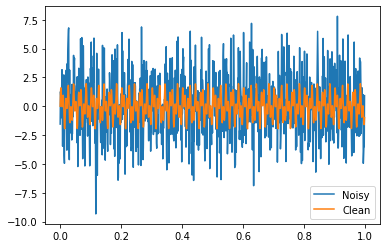

In [6]:
#Create a simple signal with two frequencies
data_step = 0.001
t = np.arange(start=0,stop=1,step=data_step)
f_clean = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)
f_noise = f_clean + 2.5*np.random.randn(len(t))
plt.plot(t, f_noise, label='Noisy')
plt.plot(t, f_clean, label='Clean')
plt.legend()

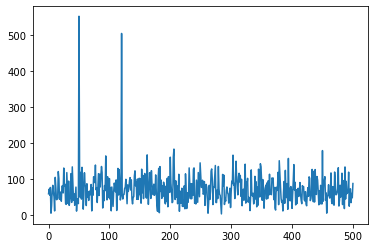

In [7]:
from scipy.fft import rfft, rfftfreq
n = len(t) # data point
yf = rfft(f_noise) # fourier transform
xf = rfftfreq(n, data_step) # take frequency axis
plt.plot(xf, np.abs(yf))

In [8]:
yf_abs = np.abs(yf)
mask = yf_abs > 250

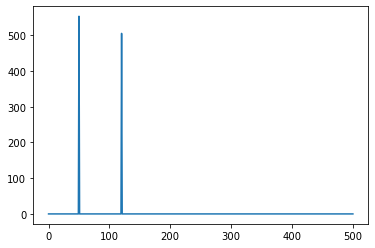

In [9]:
yf_clean = yf * mask
plt.plot(xf, np.abs(yf_clean))

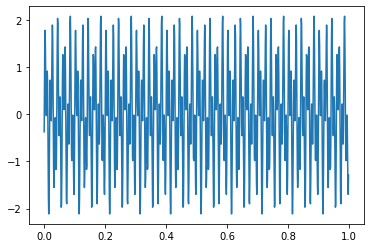

In [10]:
from scipy.fft import irfft

new_f_clean = irfft(yf_clean)
plt.plot()
plt.plot(t, new_f_clean)


___
#### Removing Audio Noise


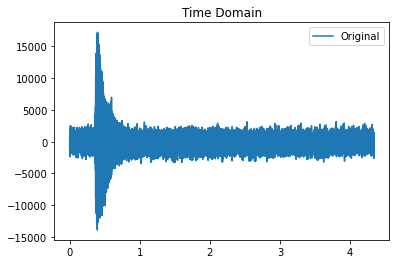

In [11]:
from scipy.io import wavfile
freq, y = wavfile.read('images/samples_original_sample1.wav')
dt = 1/freq
t = np.linspace(0, (len(y)-1)*dt, len(y))
plt.plot(t, y, label='Original')
plt.title('Time Domain')
plt.legend()

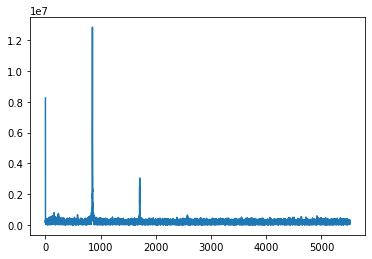

In [12]:
n = len(t)
yf = rfft(y)
xf = rfftfreq(n, dt)

plt.plot(xf, np.abs(yf))

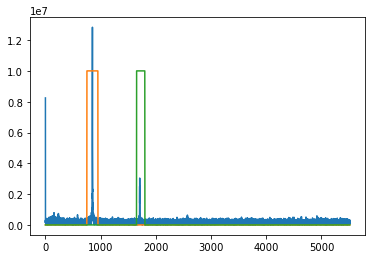

In [13]:
mask1 = np.where(np.logical_and(xf > 750, xf < 950), 1, 0)
mask2 = np.where(np.logical_and(xf > 1650, xf < 1800), 1, 0)

plt.plot(xf, np.abs(yf))
plt.plot(xf, mask1 * 1e7)
plt.plot(xf, mask2 * 1e7)


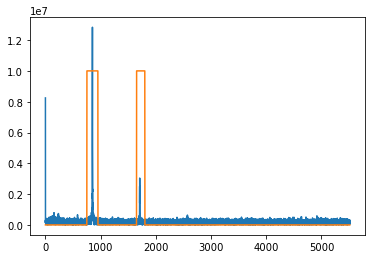

In [15]:
mask = np.logical_or(mask1, mask2)
plt.plot(xf, np.abs(yf))
plt.plot(xf, mask * 1e7)

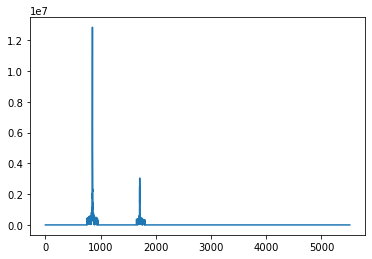

In [16]:
yf_clean = yf * mask
plt.plot(xf, np.abs(yf_clean))

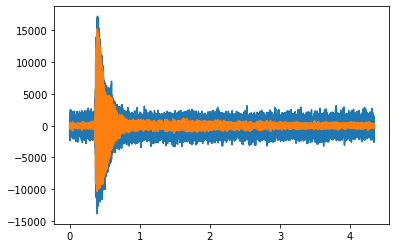

In [17]:
new_f_clean = irfft(yf_clean)
plt.plot(t, y)
plt.plot(t, new_f_clean)

In [18]:
wavfile.write('samples_noise_reduced.wav', freq, np.array(new_f_clean, dtype=np.int16))

In [19]:
y

array([  780,  -570, -1618, ...,   508, -1540,   -65], dtype=int16)

In [52]:
np.array(new_f_clean, dtype=np.int16)

array([ 0,  0,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  0,  0, -1, -1, -1,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1, -1, -1,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,
        1,  1,  0,  0, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,
        1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  0,  0, -1, -1, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1, -1, -1,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  1,  1,
        0,  0, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,
        1,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  1,  1,
        1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0